In [167]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from transformers import BertTokenizer, BertModel
import torch
import matplotlib.pyplot as plt

In [124]:
# Sample data
df = pd.read_csv("RawData.csv")
df.columns = df.columns.str.replace('\n', '')
df.replace('-', np.nan, inplace=True)

/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_28205/3741208883.py:2: DtypeWarning: Columns (12,18,19,22,23,24,25,48,59,60,61,77,79,80,81,82,105,106,108,111,114,115,116,117,122,129,132,133,134,135,151) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("RawData.csv")


In [128]:
df.columns

Index(['Project ID', 'Project Name', 'Voluntary Registry', 'ARB/WAProject',
       'Voluntary Status', 'Scope', ' Type', 'Reduction / Removal',
       'Methodology / Protocol', 'Region', 'Total Credits Issued',
       'Estimated Annual Emission Reductions', 'Registry / ARB / WA',
       'CCB / Certifications', 'Project Type From the Registry'],
      dtype='object')

In [126]:
df = df[['Project ID', 'Project Name', 'Voluntary Registry', 'ARB/WAProject',
       'Voluntary Status', 'Scope', ' Type', 'Reduction / Removal',
       'Methodology / Protocol', 'Region', 'Total Credits Issued',
       'Estimated Annual Emission Reductions', 'Registry / ARB / WA',
       'CCB / Certifications', 'Project Type From the Registry']]

In [127]:
df['Total Credits Issued'] = df['Total Credits Issued'].astype(str)
df['Total Credits Issued'] = df['Total Credits Issued'].str.strip()
df['Total Credits Issued'] = df['Total Credits Issued'].str.replace(',', '').astype(float)
df['Total Credits Issued'].fillna(0, inplace=True)

df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].astype(str)
df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].str.replace('-', '0')
df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].str.strip()
df['Estimated Annual Emission Reductions'] = df['Estimated Annual Emission Reductions'].str.replace(',', '').astype(float)
df['Estimated Annual Emission Reductions'].fillna(0, inplace=True)


/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_28205/3698468210.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Credits Issued'].fillna(0, inplace=True)
/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_28205/3698468210.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [129]:
# Encode categorical variables
cat_features = ['Voluntary Registry', 'Scope', 'Reduction / Removal', 'Region', 'Registry / ARB / WA']
cont_features = ['Total Credits Issued', 'Estimated Annual Emission Reductions']
text_features = [' Type', 'Methodology / Protocol','Project Type From the Registry']

In [150]:
df_cat = pd.get_dummies(df, columns=cat_features, drop_first=True, dummy_na=True)
df_cat = df_cat.iloc[:, 10:]

In [132]:
scaler = StandardScaler()
df_cont = scaler.fit_transform(df[['Total Credits Issued', 'Estimated Annual Emission Reductions']])

In [133]:
# Text vectorization using TF-IDF

tfidf1 = TfidfVectorizer()
df[' Type'].fillna('', inplace=True)
X_text1 = tfidf1.fit_transform(df[' Type'])

tfidf2 = TfidfVectorizer()
df['Methodology / Protocol'].fillna('', inplace=True)
X_text2 = tfidf2.fit_transform(df['Methodology / Protocol'])

tfidf3 = TfidfVectorizer()
df['Project Type From the Registry'].fillna('', inplace=True)
X_text3 = tfidf3.fit_transform(df['Project Type From the Registry'])

/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_28205/2818995313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' Type'].fillna('', inplace=True)
/var/folders/gn/x53b3rps7jz6jbl5j86y21gr0000gn/T/ipykernel_28205/2818995313.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [152]:
df_cat.head()

,Voluntary Registry_CAR,Voluntary Registry_GOLD,Voluntary Registry_VCS,Voluntary Registry_nan,Scope_Carbon Capture & Storage,Scope_Chemical Processes,Scope_Forestry & Land Use,Scope_Household & Community,Scope_Industrial & Commercial,Scope_Renewable Energy,...,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Asia,Region_nan,Registry / ARB / WA_ARB,Registry / ARB / WA_CAR,Registry / ARB / WA_GOLD,Registry / ARB / WA_VCS,Registry / ARB / WA_WA,Registry / ARB / WA_nan
0,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
# Combine all features
from scipy.sparse import hstack, csr_matrix
X_text = hstack([X_text1, X_text2, X_text3])
X_combined = hstack([df_cont, df_cat, X_text])

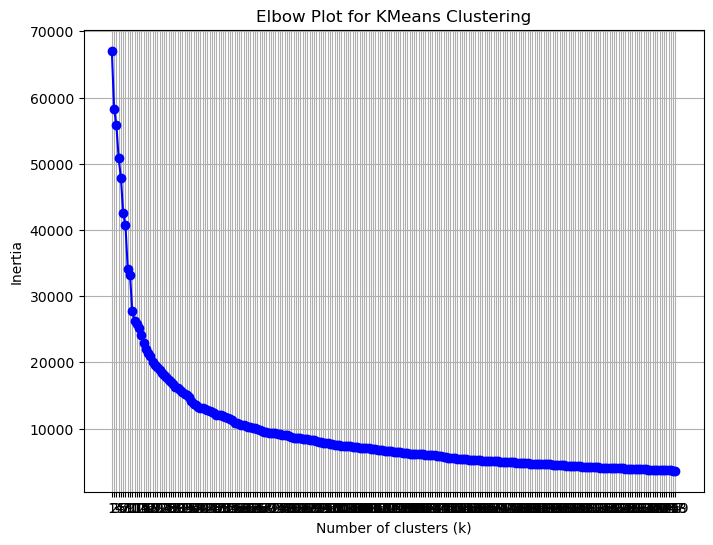

In [168]:
# Range of k values to test
k_range = range(1, 250)
inertia_values = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_combined)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [170]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=28, random_state=42)
kmeans.fit(X_combined)

# Get cluster labels
labels = kmeans.labels_

# Add cluster labels to the original dataframe
df['K_cluster'] = labels
df.head()


,Project ID,Project Name,Voluntary Registry,ARB/WAProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Total Credits Issued,Estimated Annual Emission Reductions,Registry / ARB / WA,CCB / Certifications,Project Type From the Registry,K_cluster,DB_cluster
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,22,-1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,7984006.0,0.0,ACR,NaN,Industrial Gas Substitution,20,-1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,44202.0,0.0,ACR,NaN,Livestock Waste Management,18,-1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,13,-1
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Latin America and the Caribbean,2572210.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,17,-1


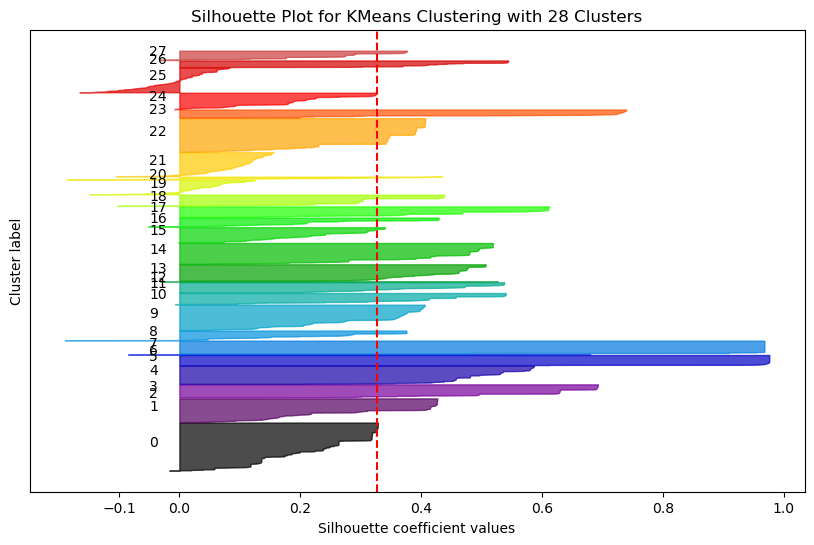

In [178]:
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

# Compute the silhouette plot
y_lower = 10
for i in range(28):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 28)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for KMeans Clustering with 28 Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [171]:
df['K_cluster'].value_counts()

K_cluster
0     1038
22     724
9      548
25     532
21     516
1      511
14     449
4      391
13     354
24     352
15     329
19     308
7      281
3      281
18     242
10     242
17     231
5      221
11     221
8      207
27     200
16     198
23     176
26     143
20      60
12      13
6        8
2        1
Name: count, dtype: int64

In [195]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming `X_combined` is the combined feature matrix from previous steps
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined.toarray())

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=50)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to the original dataframe
df['DB_cluster'] = labels
df.head()


,Project ID,Project Name,Voluntary Registry,ARB/WAProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Total Credits Issued,Estimated Annual Emission Reductions,Registry / ARB / WA,CCB / Certifications,Project Type From the Registry,K_cluster,DB_cluster
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,22,-1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,7984006.0,0.0,ACR,NaN,Industrial Gas Substitution,20,-1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,44202.0,0.0,ACR,NaN,Livestock Waste Management,18,-1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,13,-1
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Latin America and the Caribbean,2572210.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,17,-1


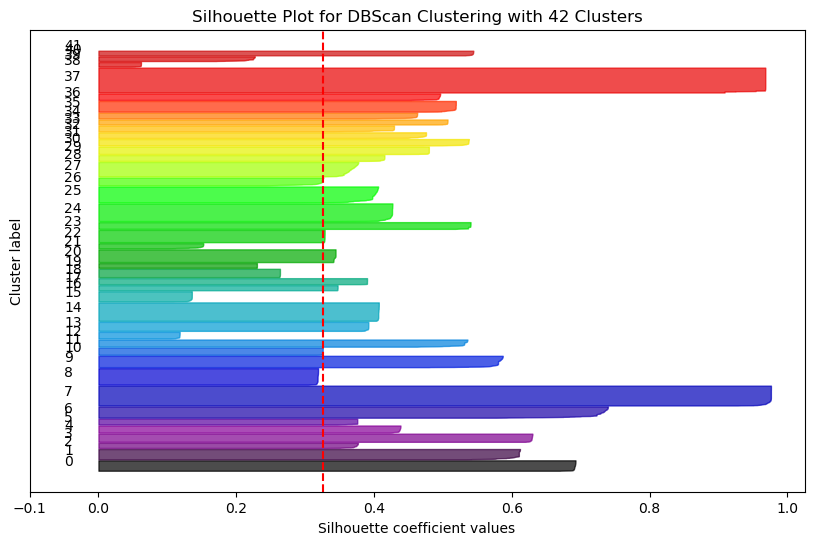

In [196]:
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

# Compute the silhouette plot
y_lower = 10
for i in range(42):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 42)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for DBScan Clustering with 42 Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [194]:
# Define ranges for eps and min_samples
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(10, 65)

best_score = -1
best_params = {}

for eps in eps_range:
    for min_samples in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        print(eps, min_samples)
        
        # Ignore silhouette score for cases where there are noise points only
        if len(set(labels)) > 1:
            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f'Best params: {best_params} with Silhouette Score: {best_score}')

0.1 10
0.1 11
0.1 12
0.1 13
0.1 14
0.1 15
0.1 16
0.1 17
0.1 18
0.1 19
0.1 20
0.1 21
0.1 22
0.1 23
0.1 24
0.1 25
0.1 26
0.1 27
0.1 28
0.1 29
0.1 30
0.1 31
0.1 32
0.1 33
0.1 34
0.1 35
0.1 36
0.1 37
0.1 38
0.1 39
0.1 40
0.1 41
0.1 42
0.1 43
0.1 44
0.1 45
0.1 46
0.1 47
0.1 48
0.1 49
0.1 50
0.1 51
0.1 52
0.1 53
0.1 54
0.1 55
0.1 56
0.1 57
0.1 58
0.1 59
0.1 60
0.1 61
0.1 62
0.1 63
0.1 64
0.2 10
0.2 11
0.2 12
0.2 13
0.2 14
0.2 15
0.2 16
0.2 17
0.2 18
0.2 19
0.2 20
0.2 21
0.2 22
0.2 23
0.2 24
0.2 25
0.2 26
0.2 27
0.2 28
0.2 29
0.2 30
0.2 31
0.2 32
0.2 33
0.2 34
0.2 35
0.2 36
0.2 37
0.2 38
0.2 39
0.2 40
0.2 41
0.2 42
0.2 43
0.2 44
0.2 45
0.2 46
0.2 47
0.2 48
0.2 49
0.2 50
0.2 51
0.2 52
0.2 53
0.2 54
0.2 55
0.2 56
0.2 57
0.2 58
0.2 59
0.2 60
0.2 61
0.2 62
0.2 63
0.2 64
0.30000000000000004 10
0.30000000000000004 11
0.30000000000000004 12
0.30000000000000004 13
0.30000000000000004 14
0.30000000000000004 15
0.30000000000000004 16
0.30000000000000004 17
0.30000000000000004 18
0.30000000000000004 19


In [199]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming `X_combined` is the combined feature matrix from previous steps
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined.toarray())

# Apply DBSCAN
dbscan = DBSCAN(eps=1.4, min_samples=10)
dbscan.fit(X_scaled)

# Get cluster labels
labels = dbscan.labels_

# Add cluster labels to the original dataframe
df['DB_cluster'] = labels
df.head()

,Project ID,Project Name,Voluntary Registry,ARB/WAProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,Total Credits Issued,Estimated Annual Emission Reductions,Registry / ARB / WA,CCB / Certifications,Project Type From the Registry,K_cluster,DB_cluster
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E.: Switch from non-renewable biomass fo...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;07: Affordable ...,Fuel Switching,22,-1
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,7984006.0,0.0,ACR,NaN,Industrial Gas Substitution,20,-1
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,44202.0,0.0,ACR,NaN,Livestock Waste Management,18,-1
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Sub-Saharan Africa,0.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,13,-1
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001 Afforestation and Reforestation of ...,Latin America and the Caribbean,2572210.0,0.0,ACR,06: Clean Water and Sanitation;13: Climate Act...,Forest Carbon,17,-1


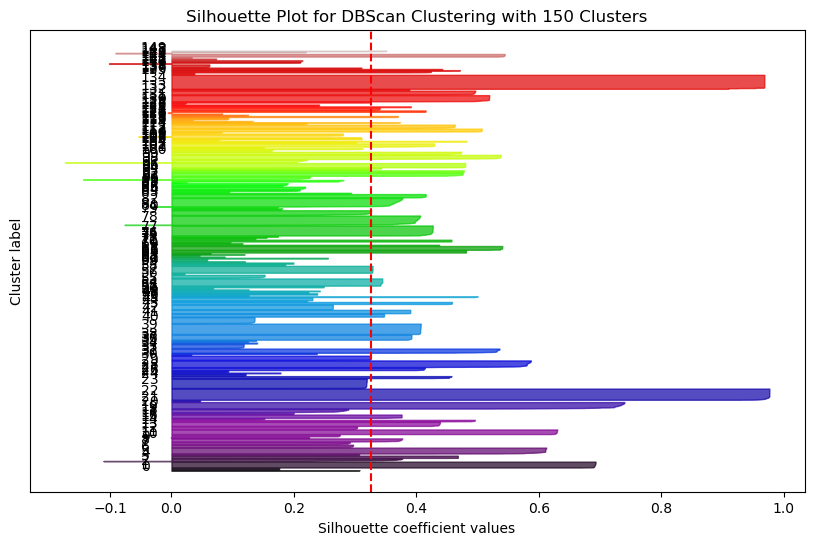

In [205]:
# Create a subplot with 1 row and 1 column
plt.figure(figsize=(10, 6))
plt.subplot(1, 1, 1)

# Compute the silhouette plot
y_lower = 10
for i in range(150):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 150)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("Silhouette Plot for DBScan Clustering with 150 Clusters")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [203]:
df['DB_cluster'].value_counts()

DB_cluster
-1      2302
 134     266
 22      212
 39      198
 77      190
        ... 
 109      10
 67       10
 66       10
 120      10
 107      10
Name: count, Length: 151, dtype: int64

In [204]:
df['DB_cluster'].unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 109, 108, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149])

In [165]:
df['K_cluster'].unique()

array([22, 36, 18, 13, 17, 23, 37, 30, 35, 24, 27,  3, 39, 33, 15, 12, 26,
        8,  5, 28,  4, 34, 31,  0, 10, 20, 38, 19, 21, 29,  1, 16,  9, 11,
       32, 25,  7,  6, 14,  2], dtype=int32)